In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller


In [13]:
# Generating the sample data

np.random.seed(0)
dates = pd.date_range(start='2024-01-01', end='2024-12-31')
data = np.random.randn(len(dates))
data = np.cumsum(data)  #Cumulative sum to make random data
df = pd.DataFrame(data,index=dates, columns=['Value'])

In [18]:
# Split the data into train and test sets
train_size = int(len(df) * 0.8)   # 80% data for training
train,test = df[:train_size], df[train_size:]

# check stationarity
def check_stationary(timeseries):
    # perform adfuller
    result = adfuller(timeseries)
    print('ADF Statistics:',result[0])
    print('p-value:', result[1])
    print('Critical Value: ')
    for key, value in result[4].items():
        print('\t%s: %.3f' %(key, value))

ADF Statistics: -1.5942103292193859
p-value: 0.48650119742142217
Critical Value: 
	1%: -3.453
	5%: -2.872
	10%: -2.572
ADF Statistics: -17.30688552784514
p-value: 5.584898848051654e-30
Critical Value: 
	1%: -3.453
	5%: -2.872
	10%: -2.572


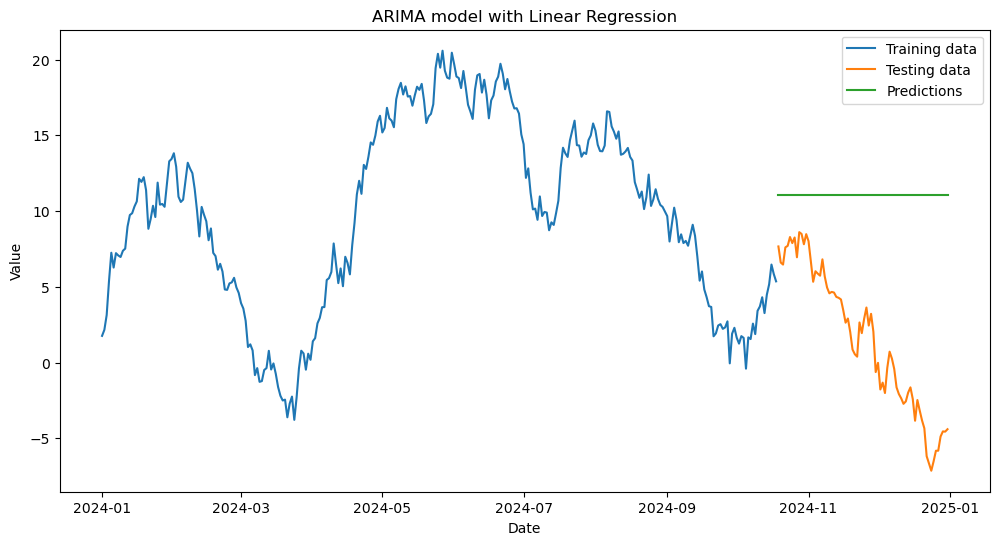

In [31]:
check_stationary(train['Value'])

# if data is not stationary, then dropna() take first difference
train_diff = train.diff().dropna()
check_stationary(train_diff['Value'])

# Fit a linear #################
X_train = np.arange(len(train)).reshape(-1,1)  # multiole ex var
y_train = train['Value']  # One response var
regressor = LinearRegression()
regressor.fit(X_train,y_train)
trend = regressor.predict(X_train)

# Fit ARIMA model on residuals
model = ARIMA(train_diff, order=(5,1,0))   # ARIMA p=5, d=1, q=0
fitted_model = model.fit()

# Predict using the fitted ARIMA model
predictions_diff = fitted_model.forecast(steps=len(test))[0]
predictions_diff = pd.Series(predictions_diff, index=test.index)

# Add trend for obtaining the final predictions
predictions = predictions_diff + trend[-1]

# Plotting the graph
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Value'], label = "Training data")
plt.plot(test.index, test['Value'], label = "Testing data")
plt.plot(predictions.index, predictions, label='Predictions')
plt.title('ARIMA model with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()